# NN Practice on CIFAR Dataset

## Importing Libraries

In [33]:
# Basics
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

# For CNN
import torch.nn as nn
import torch.nn.functional as F

# For Loss Func. And Optimization
import torch.optim as optim

# For Visual Representation
import matplotlib.pyplot as plt

print("Success")

Success


## Setup Dataset

In [34]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Number of samples processed before updating model
batch_size = 4 

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=4)
# Image Categories
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 

print("Success")

Files already downloaded and verified
Files already downloaded and verified
Success


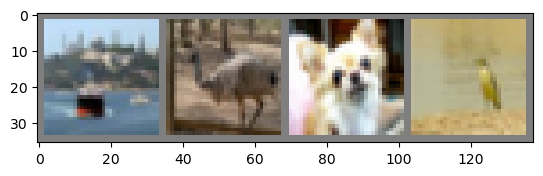

ship  bird  dog   bird 


In [35]:
# Show image
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# Randomly selected training img
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## Setup CNN

In [36]:
class Net(nn.Module):
    
    # Defining a network
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, 5) #Change argument 2 to experiment, must match argument 1 of conv 2
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 16, 5) #Change argument 1 to experiment, must match argument 2 of conv 1
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    # Defining forward pass
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [61]:
class MoreComplexNet(nn.Module):
    def __init__(self):
        super(MoreComplexNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        
        # Dropout Layers
        self.dropout1 = nn.Dropout(0.5)  

        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        
        x = F.relu(self.fc2(x))

        x = self.fc3(x)

        return x

net = MoreComplexNet()

In [62]:
# Setting up loss func. and optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9, weight_decay=0.001)

## Training

In [63]:
# Setting up CUDA Device
if torch.cuda.is_available():
    print("Available")
    device = torch.device("cuda")
    print("")


# Loop through data loader data batches
for epoch in range(20):
    
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    net.train()
    
    for images, labels in trainloader:
        
        # get inputs
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        # return statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    # Calculate training accuracy
    train_accuracy = correct_train / total_train
    
    print(f'[{epoch + 1}] loss: {running_loss / len(trainloader):.3f}, Training Accuracy: {100 * train_accuracy:.2f}%')
            
print("Training Complete")

Available

[1] loss: 1.637, Training Accuracy: 39.90%
[2] loss: 1.189, Training Accuracy: 57.36%
[3] loss: 1.007, Training Accuracy: 64.44%
[4] loss: 0.899, Training Accuracy: 68.42%
[5] loss: 0.825, Training Accuracy: 71.13%
[6] loss: 0.762, Training Accuracy: 73.20%
[7] loss: 0.704, Training Accuracy: 75.26%
[8] loss: 0.666, Training Accuracy: 76.50%
[9] loss: 0.626, Training Accuracy: 78.17%
[10] loss: 0.588, Training Accuracy: 79.27%
[11] loss: 0.566, Training Accuracy: 80.20%
[12] loss: 0.537, Training Accuracy: 81.11%
[13] loss: 0.515, Training Accuracy: 81.73%
[14] loss: 0.495, Training Accuracy: 82.61%
[15] loss: 0.476, Training Accuracy: 83.23%
[16] loss: 0.466, Training Accuracy: 83.50%
[17] loss: 0.448, Training Accuracy: 84.36%
[18] loss: 0.434, Training Accuracy: 84.80%
[19] loss: 0.429, Training Accuracy: 84.73%
[20] loss: 0.422, Training Accuracy: 85.38%
Training Complete


## Saving Model

In [64]:
PATH = './Models/cifar_net.pth'
torch.save(net.state_dict(), PATH)

## Testing Data

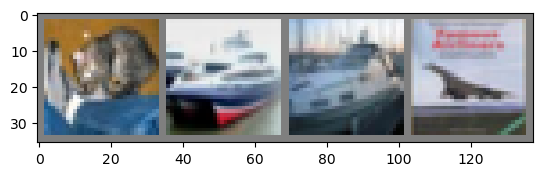

Truth:  cat   ship  ship  plane


In [73]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# show img from test set
imshow(torchvision.utils.make_grid(images))
print('Truth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [74]:
# loading saved model
net = MoreComplexNet()
net.load_state_dict(torch.load('./Models/cifar_net_gauss.pth'))

# Testing against above images
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(batch_size)))

Predicted:  bird  car   ship  horse


In [75]:
# Now test on entire dataset
correct = 0 
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        
        # Pick class with highest similarity score
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 25 %


In [68]:
# Breakdown
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 73.7 %
Accuracy for class: car   is 85.9 %
Accuracy for class: bird  is 68.1 %
Accuracy for class: cat   is 56.8 %
Accuracy for class: deer  is 57.4 %
Accuracy for class: dog   is 62.4 %
Accuracy for class: frog  is 71.4 %
Accuracy for class: horse is 69.7 %
Accuracy for class: ship  is 77.2 %
Accuracy for class: truck is 76.6 %


In [69]:
def write_accuracy_to_file(filename, correct, total, correct_pred, total_pred):
    # Open the specified text file in write mode
    with open(filename, 'w') as file:
        # Write overall accuracy to the file
        file.write(f'Total Epochs: {5}\n\n')
        file.write(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %\n\n')

        # Write accuracy for each class to the file
        for classname, correct_count in correct_pred.items():
            accuracy = 100 * float(correct_count) / total_pred[classname]
            file.write(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %\n')


In [70]:
# Provide a filename (e.g., 'my_accuracy_results.txt') as an argument
write_accuracy_to_file('cifar_net_accuracy.txt', correct, total, correct_pred, total_pred)